In [44]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
#import data
train = pd.read_csv('../../data/raw/Emergent_NAACL2016/emergent/url-versions-2015-06-14-clean-train.csv')
train.drop(columns=["Unnamed: 0"], inplace=True)

In [46]:
#create features
align_feature = pd.read_csv('../../data/processed/features/alignment_feature.csv')
cosine_feature = pd.read_csv('../../data/processed/features/cosine_feature.csv')
bow_feature = pd.read_csv('../../data/processed/features/headline_BoWBigram.csv')
qmark_feature = pd.read_csv('../../data/processed/features/headline_Qmark.csv')
neg_alignment_feature = pd.read_csv('../../data/processed/features/neg_alignment_feature.csv')
root_dist_feature = pd.read_csv('../../data/processed/features/root_dist_min.csv')
svo_feature = pd.read_csv('../../data/processed/features/svo_Lexical.csv')

In [47]:
target_map = {"for": 0, "observing": 1, "against": 2}

In [48]:
train = train.replace({"articleHeadlineStance": target_map})

In [49]:
train["articleHeadlineStance"].value_counts()

0    992
1    775
2    304
Name: articleHeadlineStance, dtype: int64

In [50]:
train = pd.merge(train, align_feature, on="articleId")
train = pd.merge(train, cosine_feature, on="articleId")
train = pd.merge(train, bow_feature, on="articleId")
train = pd.merge(train, qmark_feature, on="articleId")
train = pd.merge(train, neg_alignment_feature, on="articleId")
train = pd.merge(train, root_dist_feature, on="articleId")
train = pd.merge(train, svo_feature, on="articleId")

In [51]:
train["articleHeadlineStance"] = train["articleHeadlineStance"].astype("int")

In [52]:
# merge datasets and shuuffle with random seed
seed = 1234

train = sklearn.utils.shuffle(train, random_state=seed)



In [53]:
# create train and test

X_train = train.to_numpy()[:,5:]
Y_train = train["articleHeadlineStance"].values.reshape((-1,))

#from sklearn.model_selection import train_test_split
#X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)


In [55]:
Y_train = Y_Train
X_train = X_Train.astype(float)
#X_val = X_Test.astype(float)
#Y_val = Y_Test

In [18]:
from sklearn import preprocessing

In [19]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Number of mislabeled points out of a total 415 points : 98
Accuracy on test set: 0.763855421686747
[[0.89054726 0.10447761 0.00497512]
 [0.33333333 0.64779874 0.01886792]
 [0.16363636 0.2        0.63636364]]


array([0.80995475, 0.70068027, 0.74468085])

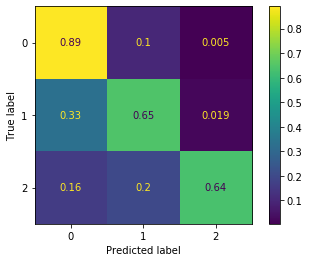

In [21]:
max_iter = 10e2
C=0.8
penalty='l1'

# Normal Train and Test

from sklearn.linear_model import LogisticRegression
soln = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter, multi_class='auto', solver="liblinear")
soln = soln.fit(X_train,Y_train)
ypred = soln.predict(X_val)

print("Number of mislabeled points out of a total %d points : %d" % (X_val.shape[0], (Y_val != ypred).sum()))
print("Accuracy on test set: "+str(soln.score(X_val,Y_val)))
print(confusion_matrix(Y_val, ypred, normalize="true"))
plot_confusion_matrix(soln, X_val, Y_val, normalize="true")

from sklearn.metrics import f1_score
f1_score(Y_val, ypred, average=None)

In [22]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(Y_val.reshape(415,1), ypred.reshape(415,1), multi_class="ovr")

ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

In [34]:
Y_val.reshape((415,1)).shape

(415, 1)

In [32]:
ypred.shape

(415,)

In [38]:
Y_val.reshape(415,1)

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [2],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
X = X_train
y = Y_train

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [57]:
max_iter = 10e2
C=0.8
penalty='l1'

# Normal Train and Test

from sklearn.linear_model import LogisticRegression
#soln = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter, multi_class='auto', solver="liblinear")
#soln = soln.fit(X_train,Y_train)
#ypred = soln.predict(X_val)


In [58]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(penalty=penalty, C=C, max_iter = max_iter, multi_class='auto', solver="liblinear"))


In [59]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

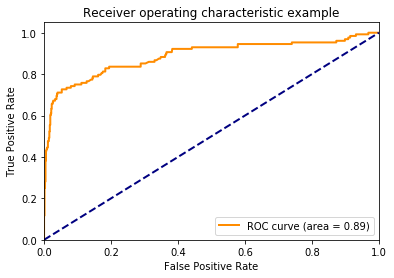

In [60]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()